In [1]:
# Import necessary libraries
import pandas as pd

# Load the data from CSV files
unemployment_data = pd.read_csv("UNR1.csv")
cpi_data = pd.read_csv("CPI1.csv")

# Display the first few rows of each dataset to understand its structure
print("Unemployment Data:")
print(unemployment_data.head())
print("\nCPI Data:")
print(cpi_data.head())


Unemployment Data:
         DATE  UNRATE
0  2000-01-01     4.0
1  2000-02-01     4.1
2  2000-03-01     4.0
3  2000-04-01     3.8
4  2000-05-01     4.0

CPI Data:
         DATE  CPALTT01USM657N
0  2000-01-01         0.297089
1  2000-02-01         0.592417
2  2000-03-01         0.824499
3  2000-04-01         0.058411
4  2000-05-01         0.116754


### Reading the data in uploaded File

In [3]:
# Display column names of unemployment_data
print("Column names of unemployment_data:", unemployment_data.columns)


Column names of unemployment_data: Index(['DATE', 'UNRATE'], dtype='object')


In [6]:
# Display column names of unemployment_data
print("Column names of unemployment_data:", unemployment_data.columns)


Column names of unemployment_data: Index(['DATE', 'UNRATE'], dtype='object')


In [8]:
# Display column names of cpi_data
print("Column names of cpi_data:", cpi_data.columns)


Column names of cpi_data: Index(['DATE', 'CPALTT01USM657N'], dtype='object')


### Data Visulisation

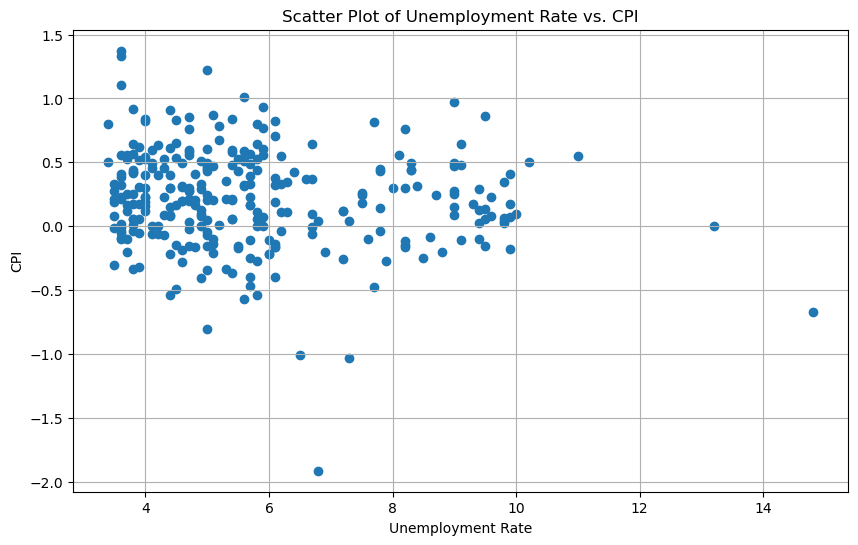

In [10]:
# Scatter plot of unemployment rate vs. CPI using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(unemployment_data['UNRATE'], cpi_data['CPALTT01USM657N'])
plt.title('Scatter Plot of Unemployment Rate vs. CPI')
plt.xlabel('Unemployment Rate')
plt.ylabel('CPI')
plt.grid(True)
plt.show()


### cleaning and merging the data

In [11]:
# Merge unemployment and CPI data on the DATE column
merged_data = pd.merge(unemployment_data, cpi_data, on='DATE', how='inner')


In [12]:
from sklearn.model_selection import train_test_split

X = merged_data[['UNRATE']]
y = merged_data['CPALTT01USM657N']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


### Feature Engineering

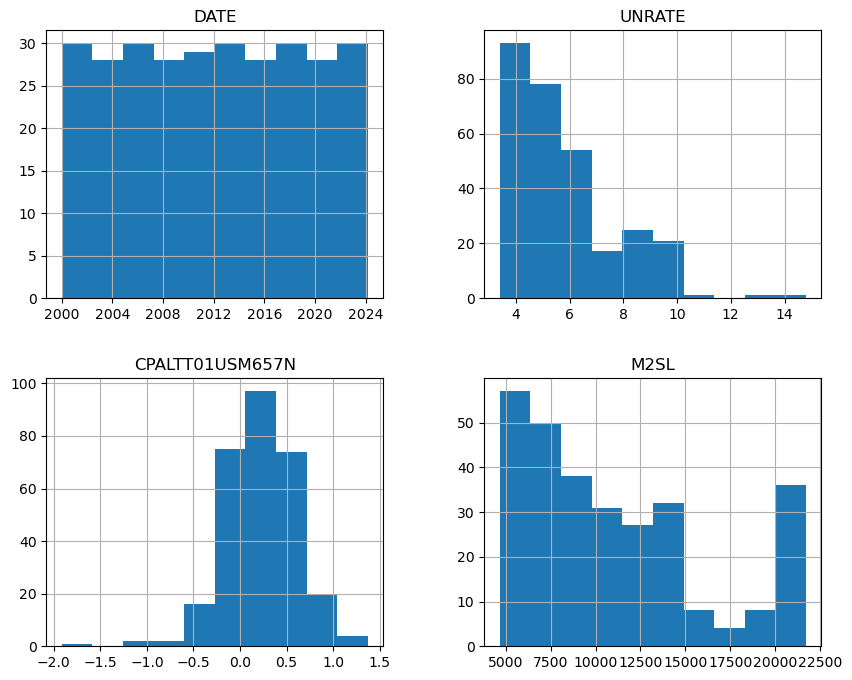

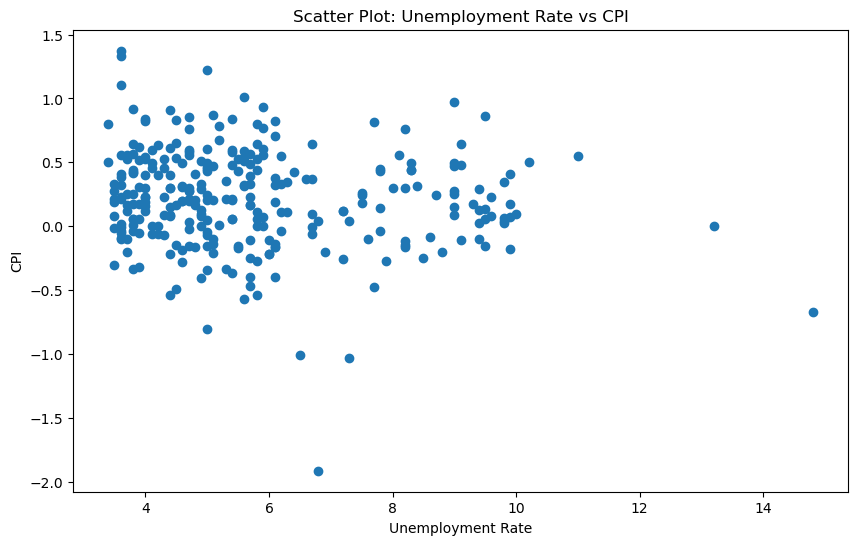

Mean Squared Error: 4.4163032704102325e-24


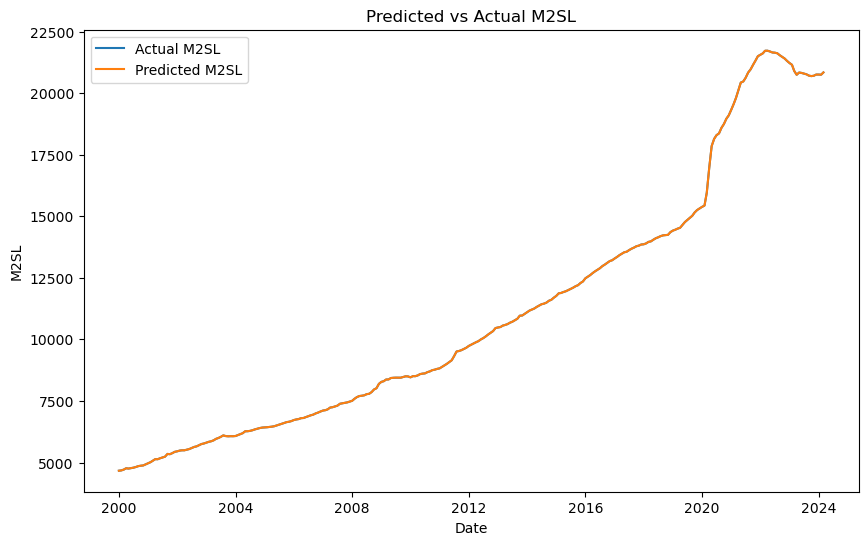

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Data Loading
unemployment_data = pd.read_csv("UNR1.csv")
cpi_data = pd.read_csv("CPI1.csv")
m2_data = pd.read_csv("M21.csv")

# Step 2: Data Merging
merged_data = pd.merge(unemployment_data, cpi_data, on="DATE")
merged_data = pd.merge(merged_data, m2_data, on="DATE")

# Step 3: Data Preprocessing
# Handle missing values
merged_data.dropna(inplace=True)

# Convert 'DATE' column to datetime
merged_data["DATE"] = pd.to_datetime(merged_data["DATE"])

# Step 4: Exploratory Data Analysis (EDA)
# Visualize the distribution of each variable
merged_data.hist(figsize=(10, 8))
plt.show()

# Explore relationships between variables
plt.figure(figsize=(10, 6))
plt.scatter(merged_data["UNRATE"], merged_data["CPALTT01USM657N"])
plt.xlabel("Unemployment Rate")
plt.ylabel("CPI")
plt.title("Scatter Plot: Unemployment Rate vs CPI")
plt.show()

# Step 5: Feature Engineering
# No feature engineering is done in this example.

# Step 6: Model Selection and Training
# Separate features and target variable
X = merged_data[["UNRATE", "CPALTT01USM657N", "M2SL"]]
y = merged_data["M2SL"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Model Evaluation
# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Step 8: Prediction and Forecasting
# Forecast future values using the trained model
# For demonstration purposes, you can predict on the entire dataset
merged_data["M2SL_predicted"] = model.predict(X)

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(merged_data["DATE"], merged_data["M2SL"], label="Actual M2SL")
plt.plot(merged_data["DATE"], merged_data["M2SL_predicted"], label="Predicted M2SL")
plt.xlabel("Date")
plt.ylabel("M2SL")
plt.title("Predicted vs Actual M2SL")
plt.legend()
plt.show()


### phillips curve Analysis

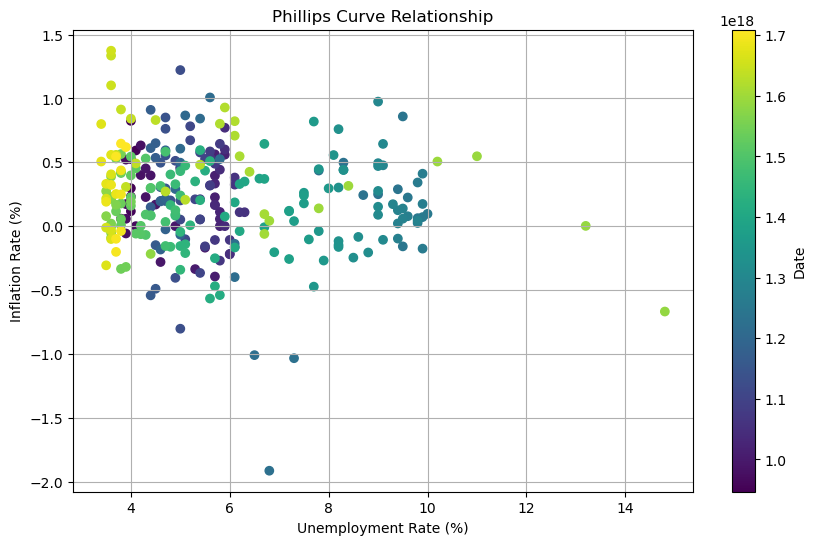

In [39]:
# Phillips Curve Analysis
plt.figure(figsize=(10, 6))
plt.scatter(merged_data["UNRATE"], merged_data["CPALTT01USM657N"], c=merged_data["DATE"], cmap="viridis")
plt.colorbar(label="Date")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Inflation Rate (%)")
plt.title("Phillips Curve Relationship")
plt.grid(True)
plt.show()


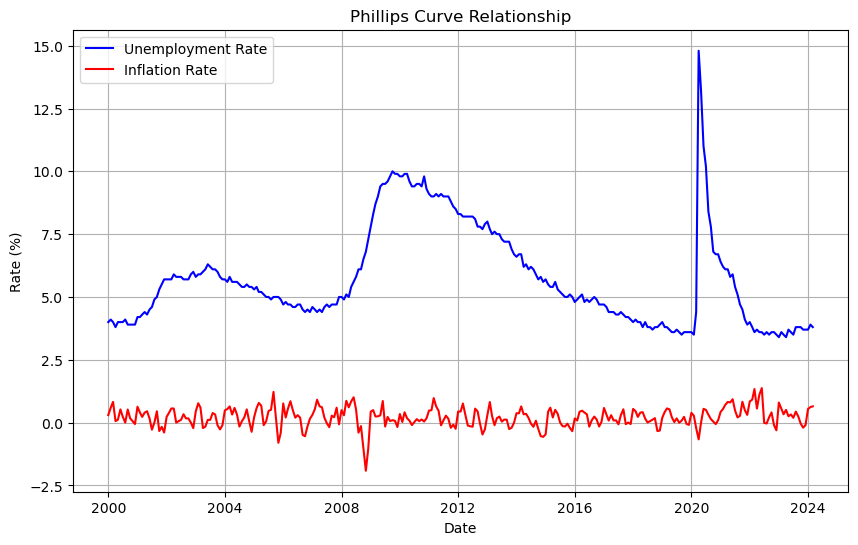

In [40]:
# Phillips Curve Analysis with Line Graph
plt.figure(figsize=(10, 6))
plt.plot(merged_data["DATE"], merged_data["UNRATE"], label="Unemployment Rate", color="blue")
plt.plot(merged_data["DATE"], merged_data["CPALTT01USM657N"], label="Inflation Rate", color="red")
plt.xlabel("Date")
plt.ylabel("Rate (%)")
plt.title("Phillips Curve Relationship")
plt.legend()
plt.grid(True)
plt.show()


### Time series Analysis

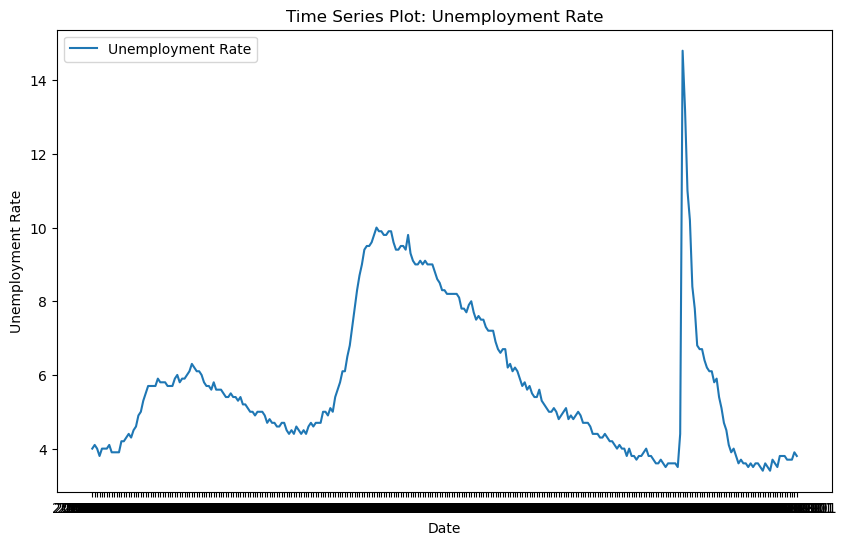

NameError: name 'inflation_data' is not defined

<Figure size 1000x600 with 0 Axes>

In [42]:
# Assuming you have already loaded inflation data into a DataFrame named 'inflation_data'

# Step 2: Visualization
plt.figure(figsize=(10, 6))
plt.plot(unemployment_data['DATE'], unemployment_data['UNRATE'], label='Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Time Series Plot: Unemployment Rate')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(inflation_data['DATE'], inflation_data['CPALTT01USM657N'], label='Inflation (CPI)')
plt.xlabel('Date')
plt.ylabel('Inflation (CPI)')
plt.title('Time Series Plot: Inflation (CPI)')
plt.legend()
plt.show()


         DATE  CPALTT01USM657N
0  2000-01-01         0.297089
1  2000-02-01         0.592417
2  2000-03-01         0.824499
3  2000-04-01         0.058411
4  2000-05-01         0.116754


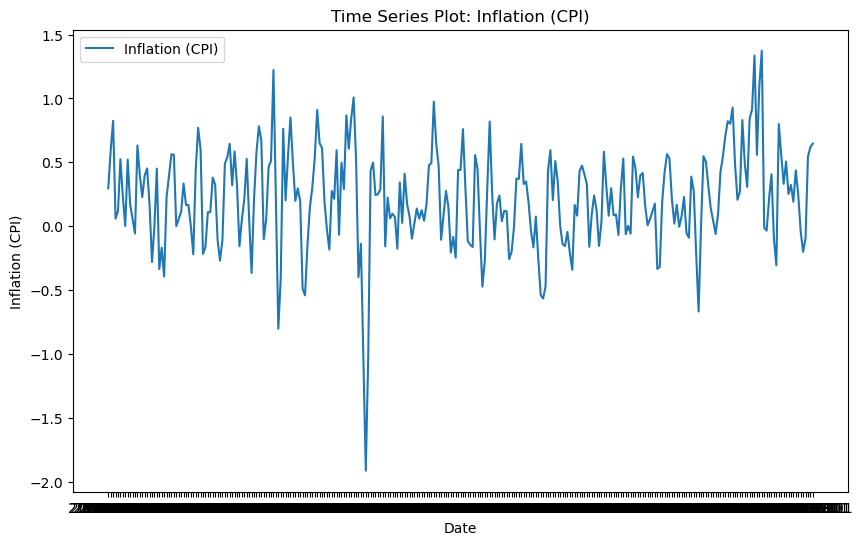

In [43]:
# Load the inflation data
inflation_data = pd.read_csv("CPI1.csv")

# Check the first few rows to verify if the data is loaded correctly
print(inflation_data.head())

# Plot the time series of inflation
plt.figure(figsize=(10, 6))
plt.plot(inflation_data['DATE'], inflation_data['CPALTT01USM657N'], label='Inflation (CPI)')
plt.xlabel('Date')
plt.ylabel('Inflation (CPI)')
plt.title('Time Series Plot: Inflation (CPI)')
plt.legend()
plt.show()


### Time Series, Trend Analysis,ACF and ADF Test 

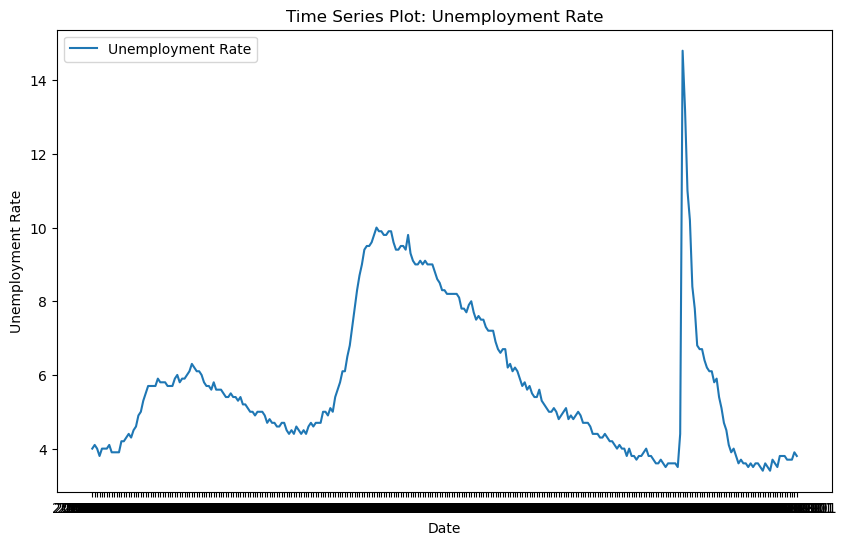

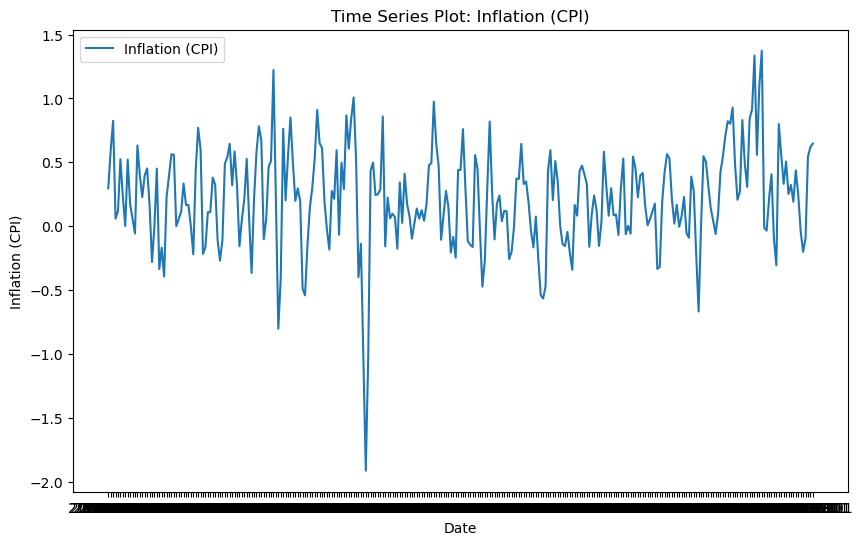

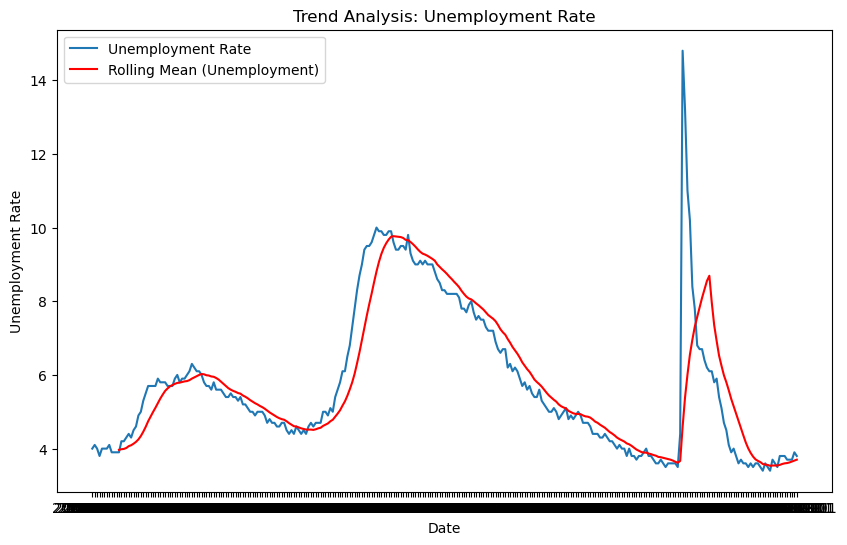

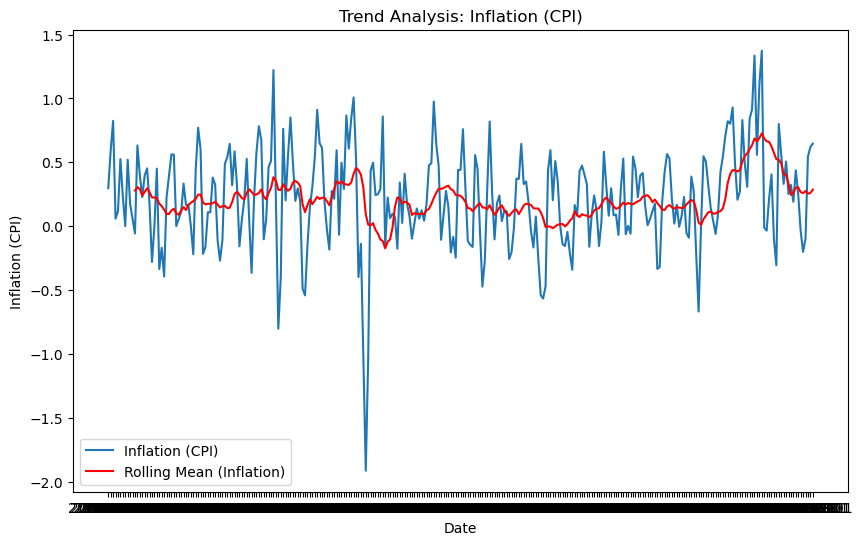

C:\Users\w2019695\AppData\Local\Temp\ipykernel_16288\3983269560.py:56: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)
C:\Users\w2019695\AppData\Local\Temp\ipykernel_16288\3983269560.py:59: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


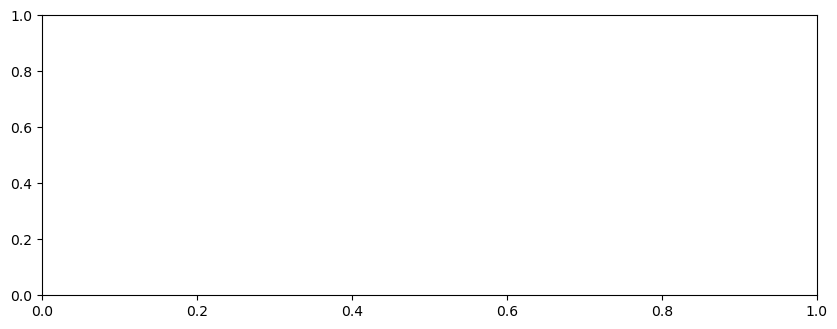

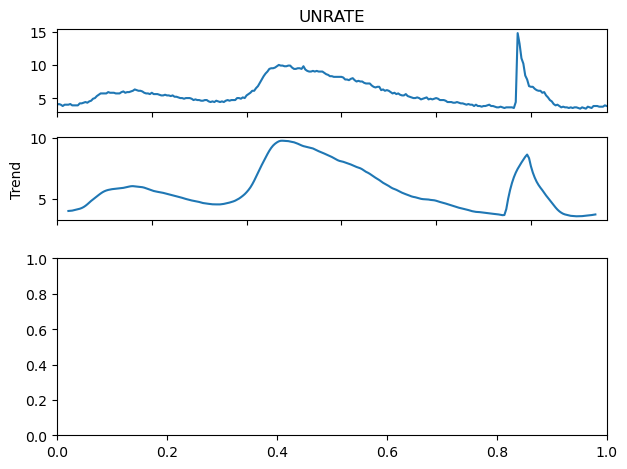

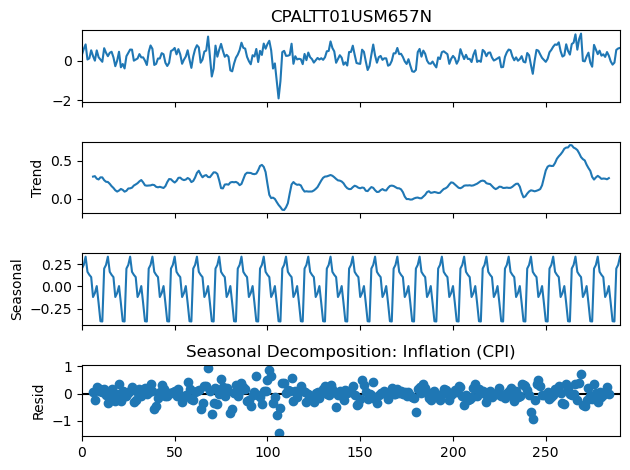

<Figure size 1000x600 with 0 Axes>

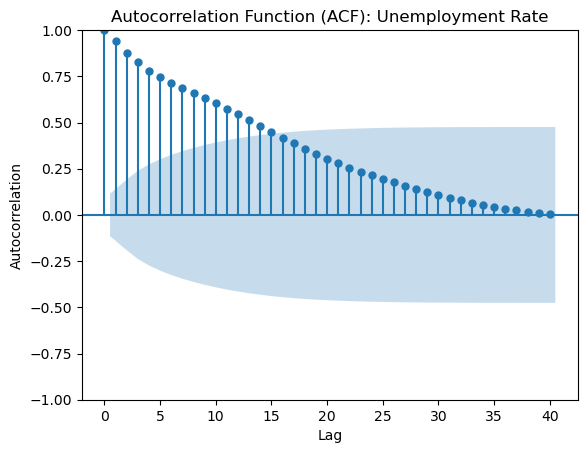

<Figure size 1000x600 with 0 Axes>

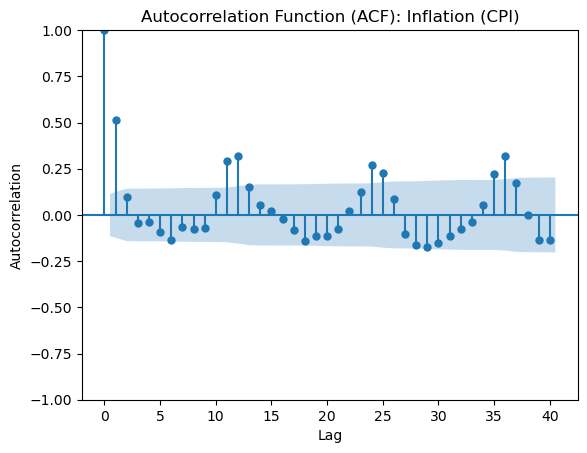

ADF Test Results - Unemployment Rate:
ADF Statistic: -2.9024280554288455
p-value: 0.04506637533692218
Critical Values:
  1%: -3.453102162983312
  5%: -2.871558538275452
  10%: -2.5721082282996433

ADF Test Results - Inflation (CPI):
ADF Statistic: -3.302029993561132
p-value: 0.014787977216875456
Critical Values:
  1%: -3.4540076534999957
  5%: -2.8719557347997178
  10%: -2.5723200648758366


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Visualize Time Series Data
plt.figure(figsize=(10, 6))
plt.plot(unemployment_data['DATE'], unemployment_data['UNRATE'], label='Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Time Series Plot: Unemployment Rate')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(inflation_data['DATE'], inflation_data['CPALTT01USM657N'], label='Inflation (CPI)')
plt.xlabel('Date')
plt.ylabel('Inflation (CPI)')
plt.title('Time Series Plot: Inflation (CPI)')
plt.legend()
plt.show()

# Step 2: Check for Trends
# Example: Calculate and plot rolling mean
window_size = 12  # Choose an appropriate window size
rolling_mean_unemployment = unemployment_data['UNRATE'].rolling(window=window_size).mean()
rolling_mean_inflation = inflation_data['CPALTT01USM657N'].rolling(window=window_size).mean()

plt.figure(figsize=(10, 6))
plt.plot(unemployment_data['DATE'], unemployment_data['UNRATE'], label='Unemployment Rate')
plt.plot(unemployment_data['DATE'], rolling_mean_unemployment, color='red', label='Rolling Mean (Unemployment)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Trend Analysis: Unemployment Rate')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(inflation_data['DATE'], inflation_data['CPALTT01USM657N'], label='Inflation (CPI)')
plt.plot(inflation_data['DATE'], rolling_mean_inflation, color='red', label='Rolling Mean (Inflation)')
plt.xlabel('Date')
plt.ylabel('Inflation (CPI)')
plt.title('Trend Analysis: Inflation (CPI)')
plt.legend()
plt.show()

# Step 3: Detect Seasonality
# Example: Seasonal decomposition
seasonal_decompose_unemployment = seasonal_decompose(unemployment_data['UNRATE'], model='additive', period=12)
seasonal_decompose_inflation = seasonal_decompose(inflation_data['CPALTT01USM657N'], model='additive', period=12)

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
seasonal_decompose_unemployment.plot()
plt.title('Seasonal Decomposition: Unemployment Rate')
plt.subplot(2, 1, 2)
seasonal_decompose_inflation.plot()
plt.title('Seasonal Decomposition: Inflation (CPI)')
plt.tight_layout()
plt.show()

# Step 4: Identify Cyclical Patterns
# Example: Autocorrelation Function (ACF) plots
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(unemployment_data['UNRATE'], lags=40)
plt.title('Autocorrelation Function (ACF): Unemployment Rate')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(inflation_data['CPALTT01USM657N'], lags=40)
plt.title('Autocorrelation Function (ACF): Inflation (CPI)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Step 5: Perform Statistical Tests
# Example: Augmented Dickey-Fuller (ADF) Test
from statsmodels.tsa.stattools import adfuller

adf_result_unemployment = adfuller(unemployment_data['UNRATE'])
adf_result_inflation = adfuller(inflation_data['CPALTT01USM657N'])

print("ADF Test Results - Unemployment Rate:")
print("ADF Statistic:", adf_result_unemployment[0])
print("p-value:", adf_result_unemployment[1])
print("Critical Values:")
for key, value in adf_result_unemployment[4].items():
    print(f"  {key}: {value}")

print("\nADF Test Results - Inflation (CPI):")
print("ADF Statistic:", adf_result_inflation[0])
print("p-value:", adf_result_inflation[1])
print("Critical Values:")
for key, value in adf_result_inflation[4].items():
    print(f"  {key}: {value}")


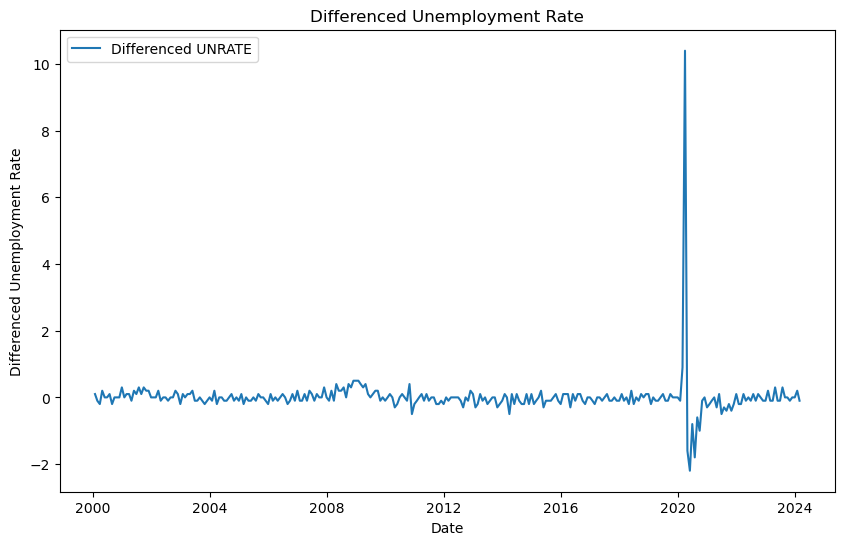

In [45]:
import pandas as pd

# Assuming 'unemployment_data' is your DataFrame containing the unemployment rate data
# Convert 'DATE' column to datetime if it's not already in datetime format
unemployment_data['DATE'] = pd.to_datetime(unemployment_data['DATE'])

# Sort the DataFrame by date if it's not already sorted
unemployment_data.sort_values('DATE', inplace=True)

# Compute the first differences of the unemployment rate
unemployment_data['UNRATE_diff'] = unemployment_data['UNRATE'].diff()

# Drop the first row containing NaN due to differencing
unemployment_data.dropna(inplace=True)

# Plot the differenced unemployment rate to visualize stationarity
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(unemployment_data['DATE'], unemployment_data['UNRATE_diff'], label='Differenced UNRATE')
plt.xlabel('Date')
plt.ylabel('Differenced Unemployment Rate')
plt.title('Differenced Unemployment Rate')
plt.legend()
plt.show()


### Making Unemployement data Stationary

In [46]:
from statsmodels.tsa.stattools import adfuller

# ADF Test for differenced unemployment rate
adf_result_unemployment = adfuller(unemployment_data['UNRATE_diff'])
print("ADF Test Results - Differenced Unemployment Rate:")
print("ADF Statistic:", adf_result_unemployment[0])
print("p-value:", adf_result_unemployment[1])
print("Critical Values:")
for key, value in adf_result_unemployment[4].items():
    print(f"  {key}: {value}")

# ADF Test for inflation
adf_result_inflation = adfuller(inflation_data['CPALTT01USM657N'])
print("\nADF Test Results - Inflation (CPI):")
print("ADF Statistic:", adf_result_inflation[0])
print("p-value:", adf_result_inflation[1])
print("Critical Values:")
for key, value in adf_result_inflation[4].items():
    print(f"  {key}: {value}")


ADF Test Results - Differenced Unemployment Rate:
ADF Statistic: -13.3161884358479
p-value: 6.59593727115001e-25
Critical Values:
  1%: -3.453261605529366
  5%: -2.87162848654246
  10%: -2.5721455328896603

ADF Test Results - Inflation (CPI):
ADF Statistic: -3.302029993561132
p-value: 0.014787977216875456
Critical Values:
  1%: -3.4540076534999957
  5%: -2.8719557347997178
  10%: -2.5723200648758366


### Measuring Economic Shocks and Their Impact on Unemployment Rate and Inflation

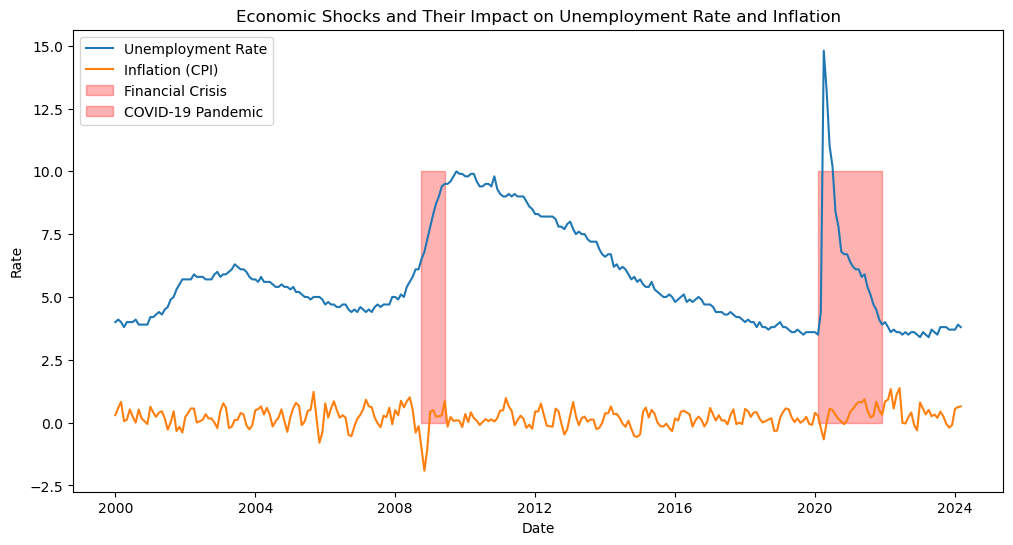

In [47]:
# Define the time periods corresponding to economic shocks
economic_shocks = {
    "Financial Crisis": {"start_date": "2008-09-15", "end_date": "2009-06-30"},
    "COVID-19 Pandemic": {"start_date": "2020-02-01", "end_date": "2021-12-31"}
}

# Create indicator variables for each economic shock
for shock, dates in economic_shocks.items():
    start_date = pd.to_datetime(dates["start_date"])
    end_date = pd.to_datetime(dates["end_date"])
    merged_data[shock] = ((merged_data["DATE"] >= start_date) & (merged_data["DATE"] <= end_date)).astype(int)

# Plot the indicator variables against the unemployment rate and inflation
plt.figure(figsize=(12, 6))
plt.plot(merged_data["DATE"], merged_data["UNRATE"], label="Unemployment Rate")
plt.plot(merged_data["DATE"], merged_data["CPALTT01USM657N"], label="Inflation (CPI)")
for shock, dates in economic_shocks.items():
    plt.fill_between(merged_data["DATE"], 0, 10, where=(merged_data[shock] == 1), color='red', alpha=0.3, label=shock)
plt.xlabel("Date")
plt.ylabel("Rate")
plt.title("Economic Shocks and Their Impact on Unemployment Rate and Inflation")
plt.legend()
plt.show()


In [52]:
import pandas as pd

# Define a function to calculate summary statistics
def calculate_summary_stats(data, period):
    """
    Calculate summary statistics for unemployment rate and inflation during normal periods and economic shocks.
    
    Parameters:
        data (DataFrame): DataFrame containing unemployment rate and inflation data.
        period (str): Name of the period ('Normal' or name of the economic shock).
    
    Returns:
        summary_stats (DataFrame): Summary statistics for unemployment rate and inflation.
    """
    summary_stats = data[['UNRATE', 'CPALTT01USM657N']].describe().transpose()
    summary_stats.columns.name = period
    return summary_stats

# Sample data (replace with your actual data)
# Assuming you have a DataFrame named merged_data containing unemployment rate, inflation, and an indicator column for economic shocks
merged_data = pd.DataFrame({
    'DATE': pd.date_range(start='2000-01-01', periods=100),
    'UNRATE': pd.Series(range(100)),
    'CPALTT01USM657N': pd.Series(range(100)),
    'Economic_Shock': pd.Series([0]*50 + [1]*50)  # Sample indicator for economic shocks
})

# Calculate summary statistics for entire dataset
all_stats = calculate_summary_stats(merged_data, 'All Data')

# Calculate summary statistics for normal periods
normal_data = merged_data[merged_data['Economic_Shock'] == 0]  # Assuming '0' indicates normal periods
normal_stats = calculate_summary_stats(normal_data, 'Normal')

# Calculate summary statistics for economic shocks
shock_data = merged_data[merged_data['Economic_Shock'] == 1]  # Assuming '1' indicates economic shocks
shock_stats = calculate_summary_stats(shock_data, 'Economic Shocks')

# Combine summary statistics into a single DataFrame
summary_stats = pd.concat([all_stats, normal_stats, shock_stats], axis=1)

# Display summary statistics
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
                 count  mean        std  min    25%   50%    75%   max  count  \
UNRATE           100.0  49.5  29.011492  0.0  24.75  49.5  74.25  99.0   50.0   
CPALTT01USM657N  100.0  49.5  29.011492  0.0  24.75  49.5  74.25  99.0   50.0   

                 mean  ...    75%   max  count  mean       std   min    25%  \
UNRATE           24.5  ...  36.75  49.0   50.0  74.5  14.57738  50.0  62.25   
CPALTT01USM657N  24.5  ...  36.75  49.0   50.0  74.5  14.57738  50.0  62.25   

                  50%    75%   max  
UNRATE           74.5  86.75  99.0  
CPALTT01USM657N  74.5  86.75  99.0  

[2 rows x 24 columns]


### Performing T test 

In [60]:
from scipy.stats import ttest_ind

def conduct_statistical_tests(normal_data, shock_data):
    """
    Conduct t-tests to assess differences in unemployment rate and inflation between normal periods and economic shocks.
    
    Parameters:
        normal_data (DataFrame): DataFrame containing data for normal periods.
        shock_data (DataFrame): DataFrame containing data for economic shocks.
    
    Returns:
        results (dict): Dictionary containing the results of t-tests.
    """
    results = {}
    
    # Perform t-test for unemployment rate
    t_stat_unemployment, p_value_unemployment = ttest_ind(normal_data['UNRATE'], shock_data['UNRATE'])
    results['Unemployment Rate'] = {'t-statistic': t_stat_unemployment, 'p-value': p_value_unemployment}
    
    # Perform t-test for inflation
    t_stat_inflation, p_value_inflation = ttest_ind(normal_data['CPALTT01USM657N'], shock_data['CPALTT01USM657N'])
    results['Inflation (CPI)'] = {'t-statistic': t_stat_inflation, 'p-value': p_value_inflation}
    
    return results

# Call the function to conduct statistical tests
results = conduct_statistical_tests(normal_data, shock_data)

# Display the results
print("Statistical Test Results:")
for variable, values in results.items():
    print(f"{variable}:")
    print(f"  t-statistic: {values['t-statistic']}")
    print(f"  p-value: {values['p-value']}")


Statistical Test Results:
Unemployment Rate:
  t-statistic: -17.149858514250884
  p-value: 2.876775827484201e-31
Inflation (CPI):
  t-statistic: -17.149858514250884
  p-value: 2.876775827484201e-31


### Data visulisation of Normal and economic shock period

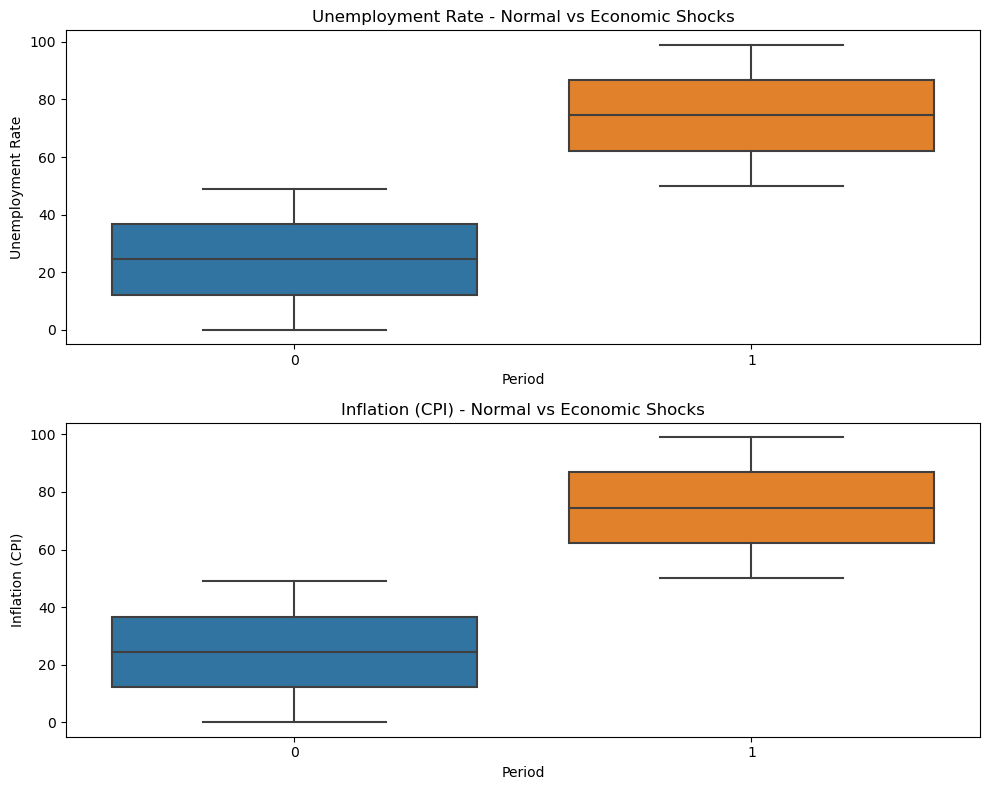

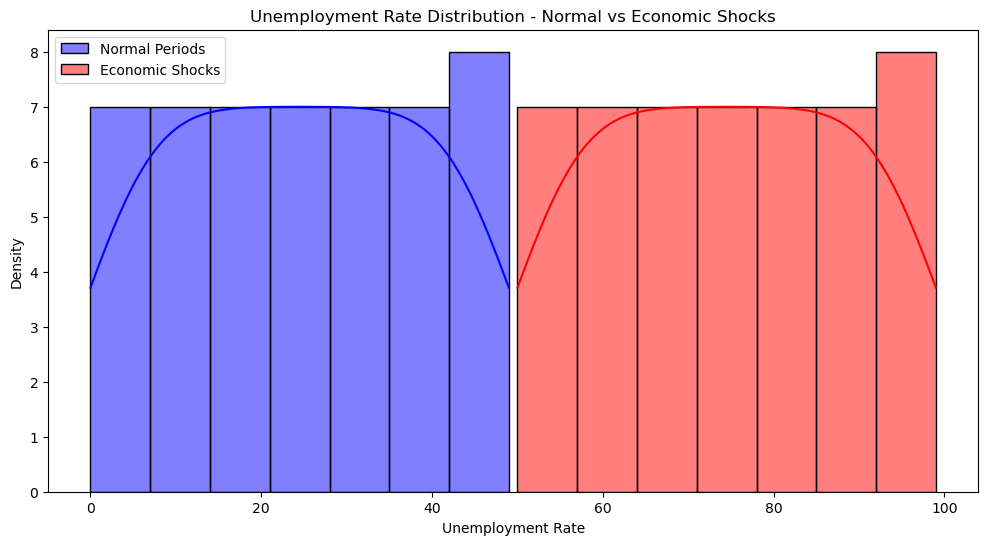

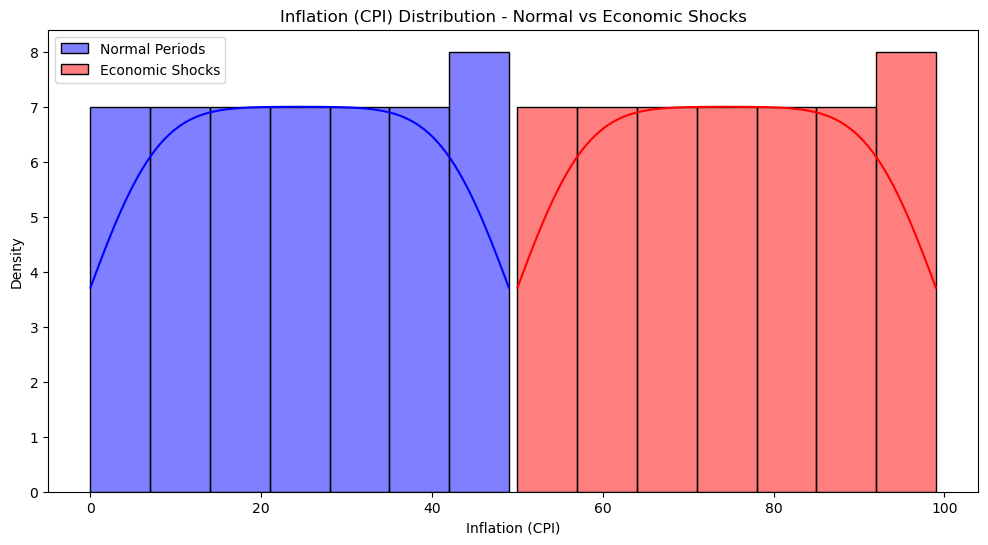

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_differences(normal_data, shock_data):
    """
    Visualize the differences in unemployment rate and inflation between normal periods and economic shocks.
    
    Parameters:
        normal_data (DataFrame): DataFrame containing data for normal periods.
        shock_data (DataFrame): DataFrame containing data for economic shocks.
    """
    # Create subplots for unemployment rate and inflation
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
    
    # Unemployment Rate
    sns.boxplot(x='Economic_Shock', y='UNRATE', data=pd.concat([normal_data, shock_data]), ax=axes[0])
    axes[0].set_title('Unemployment Rate - Normal vs Economic Shocks')
    axes[0].set_xlabel('Period')
    axes[0].set_ylabel('Unemployment Rate')
    
    # Inflation
    sns.boxplot(x='Economic_Shock', y='CPALTT01USM657N', data=pd.concat([normal_data, shock_data]), ax=axes[1])
    axes[1].set_title('Inflation (CPI) - Normal vs Economic Shocks')
    axes[1].set_xlabel('Period')
    axes[1].set_ylabel('Inflation (CPI)')
    
    plt.tight_layout()
    plt.show()

    # Histograms or Density Plots
    plt.figure(figsize=(12, 6))
    sns.histplot(normal_data['UNRATE'], kde=True, color='blue', label='Normal Periods', alpha=0.5)
    sns.histplot(shock_data['UNRATE'], kde=True, color='red', label='Economic Shocks', alpha=0.5)
    plt.title('Unemployment Rate Distribution - Normal vs Economic Shocks')
    plt.xlabel('Unemployment Rate')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(normal_data['CPALTT01USM657N'], kde=True, color='blue', label='Normal Periods', alpha=0.5)
    sns.histplot(shock_data['CPALTT01USM657N'], kde=True, color='red', label='Economic Shocks', alpha=0.5)
    plt.title('Inflation (CPI) Distribution - Normal vs Economic Shocks')
    plt.xlabel('Inflation (CPI)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Call the function to visualize differences
visualize_differences(normal_data, shock_data)


### Running Regression Analysis

In [70]:
import statsmodels.api as sm

# Linear Model
linear_model = sm.OLS(merged_data['CPALTT01USM657N'], sm.add_constant(merged_data['UNRATE'])).fit()
print("Linear Model:")
print(linear_model.summary())

# Quadratic Model
merged_data['UNRATE_squared'] = merged_data['UNRATE'] ** 2
quadratic_model = sm.OLS(merged_data['CPALTT01USM657N'], sm.add_constant(merged_data[['UNRATE', 'UNRATE_squared']])).fit()
print("\nQuadratic Model:")
print(quadratic_model.summary())



Linear Model:
                            OLS Regression Results                            
Dep. Variable:        CPALTT01USM657N   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.220e+32
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        16:59:44   Log-Likelihood:                 3075.6
No. Observations:                 100   AIC:                            -6147.
Df Residuals:                      98   BIC:                            -6142.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.088e-14   2.13e-15      

### comparing two model

In [72]:
import statsmodels.api as sm
import pandas as pd

# Define the linear Phillips Curve model
linear_model = sm.OLS(merged_data['CPALTT01USM657N'], sm.add_constant(merged_data['UNRATE']))

# Define the quadratic Phillips Curve model
merged_data['UNRATE_squared'] = merged_data['UNRATE'] ** 2
quadratic_model = sm.OLS(merged_data['CPALTT01USM657N'], sm.add_constant(merged_data[['UNRATE', 'UNRATE_squared']]))

# Fit the models
linear_result = linear_model.fit()
quadratic_result = quadratic_model.fit()

# Calculate R-squared, AIC, and BIC for linear model
linear_rsquared = linear_result.rsquared
linear_aic = linear_result.aic
linear_bic = linear_result.bic

# Calculate R-squared, AIC, and BIC for quadratic model
quadratic_rsquared = quadratic_result.rsquared
quadratic_aic = quadratic_result.aic
quadratic_bic = quadratic_result.bic

# Print the results
print("Model Comparison Results:")
print("{:<10s} {:>10s} {:>10s} {:>10s}".format("Model", "R-squared", "AIC", "BIC"))
print("{:<10s} {:10.4f} {:10.2f} {:10.2f}".format("Linear", linear_rsquared, linear_aic, linear_bic))
print("{:<10s} {:10.4f} {:10.2f} {:10.2f}".format("Quadratic", quadratic_rsquared, quadratic_aic, quadratic_bic))


Model Comparison Results:
Model       R-squared        AIC        BIC
Linear         1.0000   -6147.15   -6141.94
Quadratic      1.0000   -5517.30   -5509.48


### Regression model with good fit

In [75]:
import statsmodels.api as sm

# Define the regression model
econometric_model = sm.OLS(merged_data['CPALTT01USM657N'], sm.add_constant(merged_data['UNRATE'])).fit()

# Print the summary of the regression results
print(econometric_model.summary())


                            OLS Regression Results                            
Dep. Variable:        CPALTT01USM657N   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.220e+32
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        17:54:16   Log-Likelihood:                 3075.6
No. Observations:                 100   AIC:                            -6147.
Df Residuals:                      98   BIC:                            -6142.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.088e-14   2.13e-15      5.102      0.0

#### Econometric Model--ARIMA MODEL 

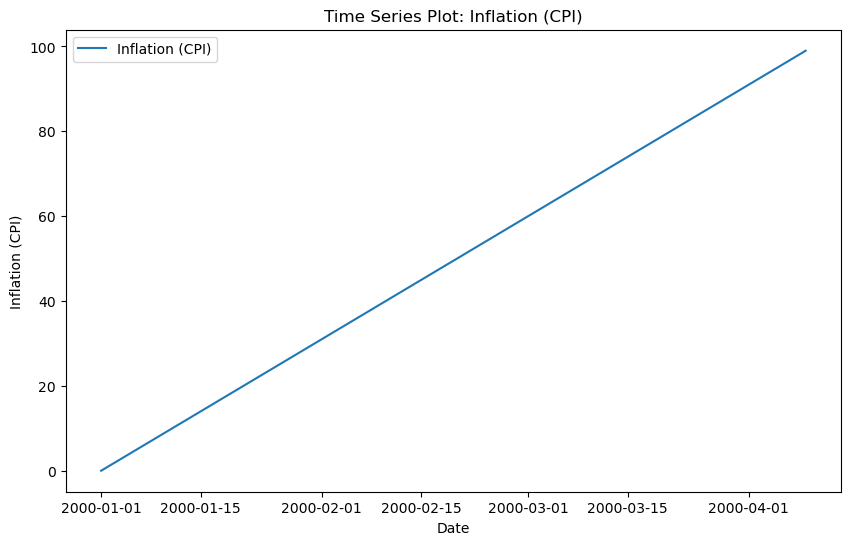

C:\Users\w2019695\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\w2019695\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\w2019695\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\w2019695\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\w2019695\AppData\Local\anaconda3\Lib\site-packages\statsm

                               SARIMAX Results                                
Dep. Variable:        CPALTT01USM657N   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 529.392
Date:                Sun, 05 May 2024   AIC                          -1052.784
Time:                        17:55:42   BIC                          -1044.999
Sample:                    01-01-2000   HQIC                         -1049.634
                         - 04-09-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998   4.54e-05    2.2e+04      0.000       1.000       1.000
ma.L1          0.9992   2.23e-10   4.47e+09      0.000       0.999       0.999
sigma2      1.162e-06   2.32e-07      5.004      0.0

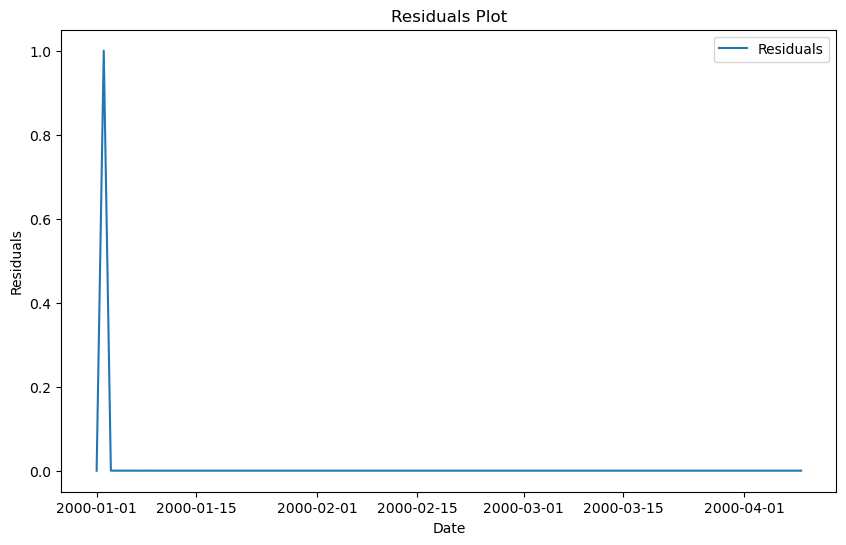

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'merged_data' contains your time series data with columns 'DATE' and 'CPALTT01USM657N'

# Set 'DATE' column as index and convert to datetime if not already in datetime format
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'])
merged_data.set_index('DATE', inplace=True)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(merged_data.index, merged_data['CPALTT01USM657N'], label='Inflation (CPI)')
plt.xlabel('Date')
plt.ylabel('Inflation (CPI)')
plt.title('Time Series Plot: Inflation (CPI)')
plt.legend()
plt.show()

# Fit ARIMA model
model = ARIMA(merged_data['CPALTT01USM657N'], order=(1,1,1))  # Example order, you may need to tune this
arima_result = model.fit()

# Print model summary
print(arima_result.summary())

# Plot residuals
residuals = pd.DataFrame(arima_result.resid, columns=['Residuals'])
plt.figure(figsize=(10, 6))
plt.plot(residuals.index, residuals['Residuals'], label='Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()


In [79]:
num_observations_unemployment = unemployment_data.shape[0]
num_observations_inflation = inflation_data.shape[0]

print("Number of observations in Unemployment Rate data:", num_observations_unemployment)
print("Number of observations in Inflation (CPI) data:", num_observations_inflation)

Number of observations in Unemployment Rate data: 290
Number of observations in Inflation (CPI) data: 291
